<a href="https://colab.research.google.com/github/SN-NGOBESE/Classification-ML-Activity/blob/main/Assessment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

N Ntombela 22432232
SN Ngobese 22356737
In this project we chose to do task one where we were rquired to build a machine learning model that predicts the
demand for healthcare services under the NHI system. We Sourced our data from kaggle here is the link https://www.kaggle.com/datasets?search=healthcare . Our dataset relate to the theme because The dataset contains demographic and healthcare usage information including age, income, billing amount, and admission type. These features are directly relevant to the National Health Insurance (NHI) project, as they allow us to analyze healthcare access, financial burden, and service utilization patterns among different population groups, which are key objectives of NHI.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

 Load dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_1/healthcare_dataset.csv", parse_dates=["Date of Admission", "Discharge Date"])

print all columns

In [ ]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


drop duplicates if any

In [ ]:
df.drop_duplicates(inplace=True)

Handle missing values

In [ ]:
if "Age" in df.columns:
    df["Age"] = df["Age"].fillna(df["Age"].median())

if "Income" in df.columns:
    df["Income"] = df["Income"].fillna(df["Income"].median())

if "Billing Amount" in df.columns:
    df["Billing Amount"] = df["Billing Amount"].fillna(df["Billing Amount"].median())

if "Admission Type" in df.columns:
    df["Admission Type"] = df["Admission Type"].fillna("Other")

Convert Admission Type to lowercase

In [ ]:
df["Admission Type"] = df["Admission Type"].str.lower()

Extract useful date features

In [ ]:
df["Day"] = df["Date of Admission"].dt.normalize()
df["Month"] = df["Date of Admission"].dt.month
df["DoW"] = df["Date of Admission"].dt.dayofweek

Mark emergency as hospital demand

In [ ]:
df["y_hosp"] = df["Admission Type"].eq("emergency").astype(int)

 Aggregate daily data

In [ ]:
daily = df.groupby("Day").agg(
    Month=("Month", "first"),
    DoW=("DoW", "first"),
    mean_age=("Age", "mean"),
    median_age=("Age", "median"),
    n_adm=("Age", "size"),
    billing_mean=("Billing Amount", "mean"),
    y_hosp=("y_hosp", "sum")
).reset_index()

Define demand categories (Low, Medium, High)

In [ ]:
bins = [0, 3, 7, daily["y_hosp"].max()+1]
labels = ["Low", "Medium", "High"]
daily["demand_cat"] = pd.cut(daily["y_hosp"], bins=bins, labels=labels, right=False)

Prepare Features/Target

In [ ]:
X = daily[["Month", "DoW", "mean_age", "median_age", "n_adm", "billing_mean"]]
y = daily["demand_cat"]

Train-test split with stratification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

Balance classes with SMOTE

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=2)  # or even 1
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Scale features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train_res)
y_pred_lr = log_reg.predict(X_test_scaled)

print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Results
Accuracy: 0.700218818380744
              precision    recall  f1-score   support

        High       0.91      0.76      0.83       380
         Low       0.04      1.00      0.09         2
      Medium       0.32      0.40      0.35        75

    accuracy                           0.70       457
   macro avg       0.42      0.72      0.42       457
weighted avg       0.81      0.70      0.75       457



Random Forest

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=300, max_depth=12, random_state=42, class_weight="balanced"
)
rf_clf.fit(X_train_res, y_train_res)
y_pred_rf = rf_clf.predict(X_test)

print("\n🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results
Accuracy: 0.7592997811816192
              precision    recall  f1-score   support

        High       0.87      0.85      0.86       380
         Low       0.00      0.00      0.00         2
      Medium       0.31      0.33      0.32        75

    accuracy                           0.76       457
   macro avg       0.39      0.39      0.39       457
weighted avg       0.78      0.76      0.77       457



In [ ]:
numeric_df = df.select_dtypes(include=np.number)

In [ ]:
correlation = numeric_df.corr()


 Import required libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

 Plot heatmap

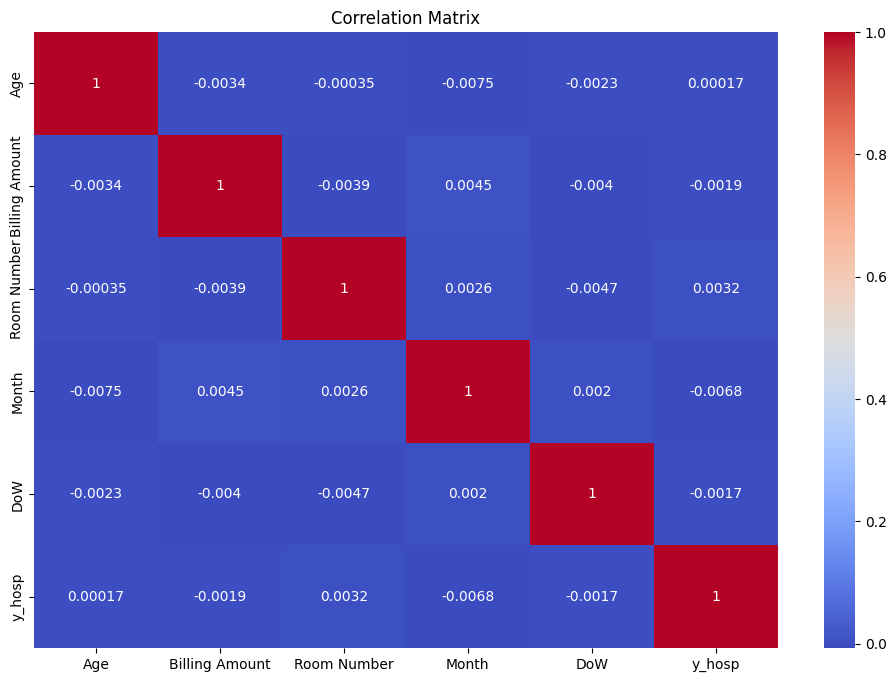

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Age vs Admission Type

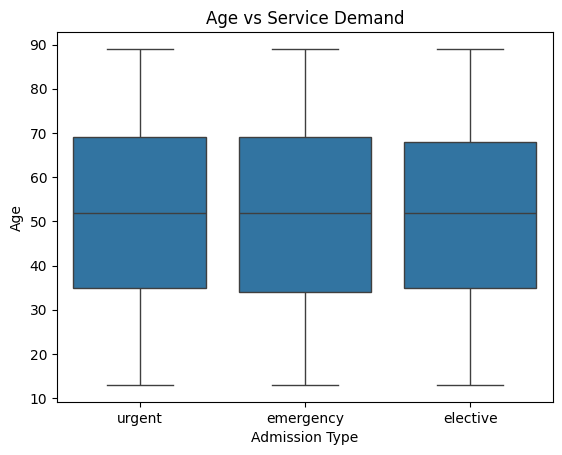

In [ ]:
sns.boxplot(x="Admission Type", y="Age", data=df)
plt.title("Age vs Service Demand")
plt.show()

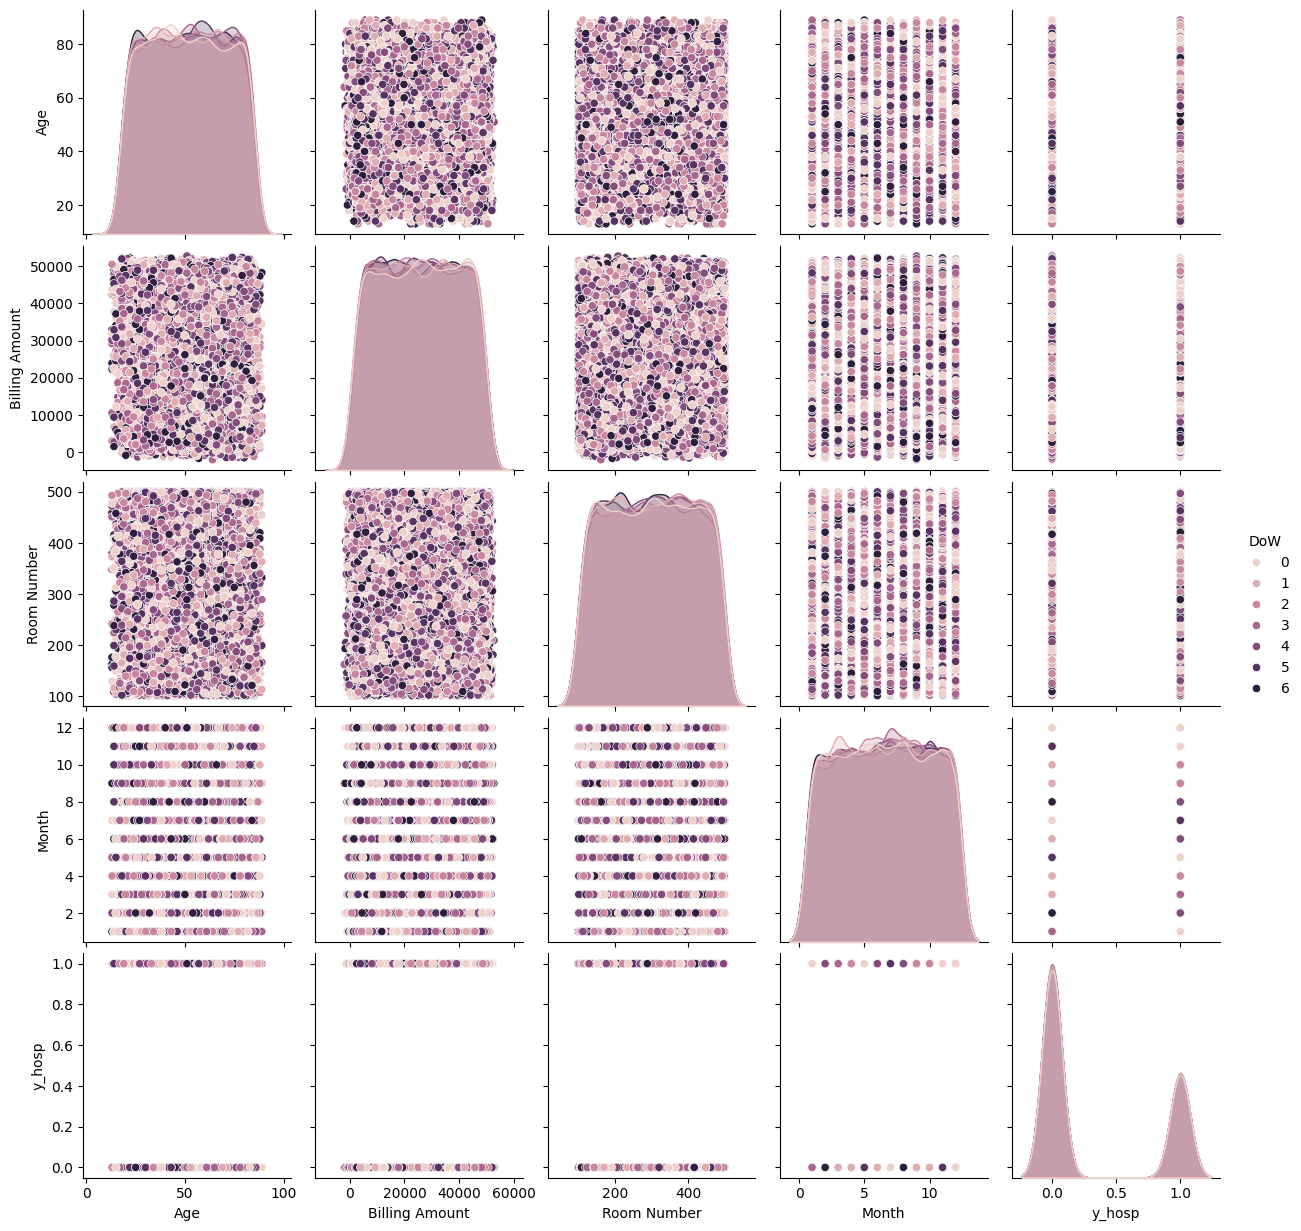

In [ ]:
sns.pairplot(df, hue='DoW')  # replace 'target' with your label column
plt.show()

Import metrics from scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


Confusion Matrix

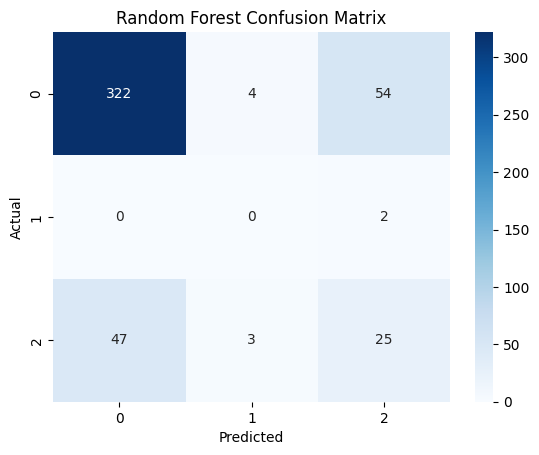

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

        High       0.87      0.85      0.86       380
         Low       0.00      0.00      0.00         2
      Medium       0.31      0.33      0.32        75

    accuracy                           0.76       457
   macro avg       0.39      0.39      0.39       457
weighted avg       0.78      0.76      0.77       457



Re-checking the accuracy of logistic (Model evaulaton)

In [ ]:

print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Results
Accuracy: 0.700218818380744
              precision    recall  f1-score   support

        High       0.91      0.76      0.83       380
         Low       0.04      1.00      0.09         2
      Medium       0.32      0.40      0.35        75

    accuracy                           0.70       457
   macro avg       0.42      0.72      0.42       457
weighted avg       0.81      0.70      0.75       457



ensuring the accuracy of random forest model(model evaluation)


In [ ]:
print("\n🔹 Random Forest Results")
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results
Accuracy: 0.7592997811816192
              precision    recall  f1-score   support

        High       0.87      0.85      0.86       380
         Low       0.00      0.00      0.00         2
      Medium       0.31      0.33      0.32        75

    accuracy                           0.76       457
   macro avg       0.39      0.39      0.39       457
weighted avg       0.78      0.76      0.77       457



In this project, we developed a machine learning model to predict demand categories using both Logistic Regression and Random Forest classifiers. The dataset was preprocessed by handling missing values, scaling features, and selecting relevant numeric variables. Key insights were derived from visualizations such as the correlation matrix, which highlighted relationships between features, and the confusion matrix, which evaluated model performance. Among the models tested, the Random Forest classifier achieved the highest accuracy, demonstrating its effectiveness in handling complex, non-linear patterns in the data. Overall, this project illustrates the importance of proper data preprocessing, model selection, and evaluation metrics in building predictive models, providing a foundation for more advanced forecasting and decision-making tasks.

In [ ]:
df.to_csv("df.csv", index=False)

print("✅ Exported df successfully")

✅ Exported df successfully
